In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(["science", "nature"])
%matplotlib inline

## Load results

In [50]:
all_out = glob("out/**/*.pkl")

In [51]:
all_out = [load_pickle(p) for p in all_out]

In [52]:
extracted_res = []

ohe_tanimoto_res = []
rxnfp_linear_res = []
rxnfp_rbf_res = []
drfp_linear_res = []
drfp_rbf_res = []

for out in all_out:
    res = {
        "train_size": out["train_size"],
        "frac_valid": out["frac_valid"],
        "accuracy": out["accuracy"],
        "f1_macro": out["f1_macro"],
        "f1_micro": out["f1_micro"],
        "kappa": out["kappa"],
        "num_classes": out["num_classes"],
        "one_hot": out["one_hot"],
    }

    res_ohe_tanimoto = {
        "frac_valid": out["baseline"]["metrics"]["ohe-tanimoto"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["ohe-tanimoto"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["ohe-tanimoto"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["ohe-tanimoto"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["ohe-tanimoto"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    res_rxnfp_linear = {
        "frac_valid": out["baseline"]["metrics"]["rxnfp-linear"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["rxnfp-linear"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["rxnfp-linear"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["rxnfp-linear"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["rxnfp-linear"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    res_rxnfp_rbf = {
        "frac_valid": out["baseline"]["metrics"]["rxnfp-rbf"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["rxnfp-rbf"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["rxnfp-rbf"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["rxnfp-rbf"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["rxnfp-rbf"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    res_drfp_rbf = {
        "frac_valid": out["baseline"]["metrics"]["drfp-rbf"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["drfp-rbf"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["drfp-rbf"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["drfp-rbf"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["drfp-rbf"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    res_drfp_linear = {
        "frac_valid": out["baseline"]["metrics"]["drfp-linear"]["frac_valid"],
        "accuracy": out["baseline"]["metrics"]["drfp-linear"]["accuracy"],
        "f1_macro": out["baseline"]["metrics"]["drfp-linear"]["f1_macro"],
        "f1_micro": out["baseline"]["metrics"]["drfp-linear"]["f1_micro"],
        "kappa": out["baseline"]["metrics"]["drfp-linear"]["kappa"],
        "num_classes": out["num_classes"],
        "train_size": out["train_size"],
    }

    extracted_res.append(res)

    ohe_tanimoto_res.append(res_ohe_tanimoto)

    rxnfp_linear_res.append(res_rxnfp_linear)

    rxnfp_rbf_res.append(res_rxnfp_rbf)

    drfp_linear_res.append(res_drfp_linear)

    drfp_rbf_res.append(res_drfp_rbf)

In [53]:
extracted_res = pd.DataFrame(extracted_res)
ohe_tanimoto_res = pd.DataFrame(ohe_tanimoto_res)
rxnfp_linear_res = pd.DataFrame(rxnfp_linear_res)
rxnfp_rbf_res = pd.DataFrame(rxnfp_rbf_res)
drfp_linear_res = pd.DataFrame(drfp_linear_res)
drfp_rbf_res = pd.DataFrame(drfp_rbf_res)

In [54]:
extracted_res

,train_size,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,one_hot
0,200,1.0,0.51,0.493042,0.51,3.875000e-01,5,True
1,10,1.0,0.52,0.500000,0.52,4.000000e-02,2,False
2,100,1.0,0.51,0.505016,0.51,3.875000e-01,5,False
3,10,1.0,0.24,0.163893,0.24,5.000000e-02,5,False
4,100,1.0,0.48,0.472513,0.48,3.500000e-01,5,False
5,50,1.0,0.35,0.350025,0.35,1.875000e-01,5,True
6,50,1.0,0.73,0.729757,0.73,4.600000e-01,2,False
7,200,1.0,0.77,0.769793,0.77,5.400000e-01,2,False
8,100,1.0,0.46,0.458227,0.46,3.250000e-01,5,True
9,50,1.0,0.74,0.737374,0.74,4.800000e-01,2,True


In [55]:
ohe_tanimoto_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.46,0.445952,0.46,0.3250,5,200
1,1.0,0.50,0.333333,0.50,0.0000,2,10
2,1.0,0.36,0.368581,0.36,0.2000,5,100
3,1.0,0.20,0.066667,0.20,0.0000,5,10
4,1.0,0.40,0.365987,0.40,0.2500,5,100
5,1.0,0.32,0.310712,0.32,0.1500,5,50
6,1.0,0.67,0.665958,0.67,0.3400,2,50
7,1.0,0.86,0.857955,0.86,0.7200,2,200
8,1.0,0.40,0.365987,0.40,0.2500,5,100
9,1.0,0.72,0.717172,0.72,0.4400,2,50


In [56]:
rxnfp_linear_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.26,0.249762,0.26,0.0750,5,200
1,1.0,0.50,0.333333,0.50,0.0000,2,10
2,1.0,0.46,0.463347,0.46,0.3250,5,100
3,1.0,0.20,0.066667,0.20,0.0000,5,10
4,1.0,0.29,0.259250,0.29,0.1125,5,100
5,1.0,0.22,0.187571,0.22,0.0250,5,50
6,1.0,0.73,0.708769,0.73,0.4600,2,50
7,1.0,0.78,0.775602,0.78,0.5600,2,200
8,1.0,0.29,0.259250,0.29,0.1125,5,100
9,1.0,0.75,0.742560,0.75,0.5000,2,50


In [57]:
rxnfp_rbf_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.26,0.230456,0.26,0.0750,5,200
1,1.0,0.50,0.333333,0.50,0.0000,2,10
2,1.0,0.34,0.309194,0.34,0.1750,5,100
3,1.0,0.31,0.309537,0.31,0.1375,5,10
4,1.0,0.27,0.226013,0.27,0.0875,5,100
5,1.0,0.27,0.272890,0.27,0.0875,5,50
6,1.0,0.69,0.669333,0.69,0.3800,2,50
7,1.0,0.71,0.703325,0.71,0.4200,2,200
8,1.0,0.27,0.226013,0.27,0.0875,5,100
9,1.0,0.78,0.777778,0.78,0.5600,2,50


In [58]:
drfp_linear_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.34,0.346641,0.34,0.1750,5,200
1,1.0,0.50,0.333333,0.50,0.0000,2,10
2,1.0,0.43,0.433454,0.43,0.2875,5,100
3,1.0,0.30,0.304256,0.30,0.1250,5,10
4,1.0,0.38,0.382160,0.38,0.2250,5,100
5,1.0,0.38,0.371099,0.38,0.2250,5,50
6,1.0,0.74,0.734802,0.74,0.4800,2,50
7,1.0,0.84,0.836801,0.84,0.6800,2,200
8,1.0,0.38,0.382160,0.38,0.2250,5,100
9,1.0,0.81,0.806734,0.81,0.6200,2,50


In [59]:
drfp_rbf_res

,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,train_size
0,1.0,0.41,0.407280,0.41,0.2625,5,200
1,1.0,0.50,0.333333,0.50,0.0000,2,10
2,1.0,0.46,0.460259,0.46,0.3250,5,100
3,1.0,0.20,0.066667,0.20,0.0000,5,10
4,1.0,0.20,0.066667,0.20,0.0000,5,100
5,1.0,0.20,0.066667,0.20,0.0000,5,50
6,1.0,0.70,0.687500,0.70,0.4000,2,50
7,1.0,0.89,0.889724,0.89,0.7800,2,200
8,1.0,0.20,0.066667,0.20,0.0000,5,100
9,1.0,0.50,0.333333,0.50,0.0000,2,50


In [60]:
grouped_extracted_res = extracted_res.groupby(["num_classes", "train_size", "one_hot"]).agg(
    ["mean", "std", sem]
)

grouped_ohe_tanimoto_res = ohe_tanimoto_res.groupby(["num_classes", "train_size"]).agg(
    ["mean", "std", sem]
)
grouped_rxnfp_linear_res = rxnfp_linear_res.groupby(["num_classes", "train_size"]).agg(
    ["mean", "std", sem]
)
grouped_rxnfp_rbf_res = rxnfp_rbf_res.groupby(["num_classes", "train_size"]).agg(
    ["mean", "std", sem]
)
grouped_drfp_linear_res = drfp_linear_res.groupby(["num_classes", "train_size"]).agg(
    ["mean", "std", sem]
)
grouped_drfp_rbf_res = drfp_rbf_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

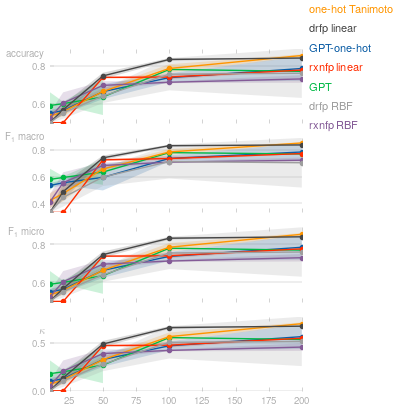

In [61]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(
        4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex="all"
    )

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
        ax[i].plot(
            grouped_extracted_res.loc[2, :, True].index,
            grouped_extracted_res.loc[2, :, True][metric]["mean"],
            marker="o",
            label="GPT-one-hot",
        )
        ax[i].fill_between(
            grouped_extracted_res.loc[2, :, True].index,
            grouped_extracted_res.loc[2, :, True][metric]["mean"]
            - grouped_extracted_res.loc[2, :, True][metric]["sem"],
            grouped_extracted_res.loc[2, :, True][metric]["mean"]
            + grouped_extracted_res.loc[2, :, True][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_extracted_res.loc[2, :, False].index,
            grouped_extracted_res.loc[2, :, False][metric]["mean"],
            marker="o",
            label="GPT",
        )
        ax[i].fill_between(
            grouped_extracted_res.loc[2, :, False].index,
            grouped_extracted_res.loc[2, :, False][metric]["mean"]
            - grouped_extracted_res.loc[2, :, False][metric]["sem"],
            grouped_extracted_res.loc[2, :, False][metric]["mean"]
            + grouped_extracted_res.loc[2, :, False][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_ohe_tanimoto_res.loc[2, :].index,
            grouped_ohe_tanimoto_res.loc[2, :][metric]["mean"],
            marker="o",
            label="one-hot Tanimoto",
        )
        ax[i].fill_between(
            grouped_ohe_tanimoto_res.loc[2, :].index,
            grouped_ohe_tanimoto_res.loc[2, :][metric]["mean"]
            - grouped_ohe_tanimoto_res.loc[2, :][metric]["sem"],
            grouped_ohe_tanimoto_res.loc[2, :][metric]["mean"]
            + grouped_ohe_tanimoto_res.loc[2, :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_rxnfp_linear_res.loc[2, :].index,
            grouped_rxnfp_linear_res.loc[2, :][metric]["mean"],
            marker="o",
            label="rxnfp linear",
        )
        ax[i].fill_between(
            grouped_rxnfp_linear_res.loc[2, :].index,
            grouped_rxnfp_linear_res.loc[2, :][metric]["mean"]
            - grouped_rxnfp_linear_res.loc[2, :][metric]["sem"],
            grouped_rxnfp_linear_res.loc[2, :][metric]["mean"]
            + grouped_rxnfp_linear_res.loc[2, :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_rxnfp_rbf_res.loc[2, :].index,
            grouped_rxnfp_rbf_res.loc[2, :][metric]["mean"],
            marker="o",
            label="rxnfp RBF",
        )
        ax[i].fill_between(
            grouped_rxnfp_rbf_res.loc[2, :].index,
            grouped_rxnfp_rbf_res.loc[2, :][metric]["mean"]
            - grouped_rxnfp_rbf_res.loc[2, :][metric]["sem"],
            grouped_rxnfp_rbf_res.loc[2, :][metric]["mean"]
            + grouped_rxnfp_rbf_res.loc[2, :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_drfp_linear_res.loc[2, :].index,
            grouped_drfp_linear_res.loc[2, :][metric]["mean"],
            marker="o",
            label="drfp linear",
        )
        ax[i].fill_between(
            grouped_drfp_linear_res.loc[2, :].index,
            grouped_drfp_linear_res.loc[2, :][metric]["mean"]
            - grouped_drfp_linear_res.loc[2, :][metric]["sem"],
            grouped_drfp_linear_res.loc[2, :][metric]["mean"]
            + grouped_drfp_linear_res.loc[2, :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_drfp_rbf_res.loc[2, :].index,
            grouped_drfp_rbf_res.loc[2, :][metric]["mean"],
            marker="o",
            label="drfp RBF",
        )
        ax[i].fill_between(
            grouped_drfp_rbf_res.loc[2, :].index,
            grouped_drfp_rbf_res.loc[2, :][metric]["mean"]
            - grouped_drfp_rbf_res.loc[2, :][metric]["sem"],
            grouped_drfp_rbf_res.loc[2, :][metric]["mean"]
            + grouped_drfp_rbf_res.loc[2, :][metric]["sem"],
            alpha=0.2,
        )

    matplotx.line_labels(ax[0], fontsize=8)

    matplotx.ylabel_top("accuracy", ax=ax[0])
    matplotx.ylabel_top(r"F$_{1}$ macro", ax=ax[1])
    matplotx.ylabel_top(r"F$_{1}$ micro", ax=ax[2])
    matplotx.ylabel_top(r"$\kappa$", ax=ax[3])

    fig.savefig("rxn-doyle-classification_results_2.pdf", bbox_inches="tight")

In [64]:
find_learning_curve_intersection(
    grouped_extracted_res.loc[2, :, False]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_drfp_rbf_res.loc[2, :].index,
        grouped_drfp_rbf_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

3.401540965627819

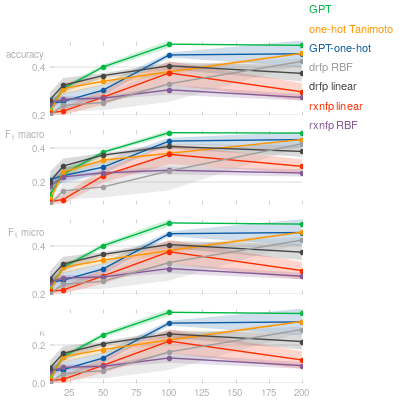

In [62]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(
        4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex="all"
    )

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
        ax[i].plot(
            grouped_extracted_res.loc[5, :, True].index,
            grouped_extracted_res.loc[5, :, True][metric]["mean"],
            marker="o",
            label="GPT-one-hot",
        )
        ax[i].fill_between(
            grouped_extracted_res.loc[5, :, True].index,
            grouped_extracted_res.loc[5, :, True][metric]["mean"]
            - grouped_extracted_res.loc[5, :, True][metric]["sem"],
            grouped_extracted_res.loc[5, :, True][metric]["mean"]
            + grouped_extracted_res.loc[5, :, True][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_extracted_res.loc[5, :, False].index,
            grouped_extracted_res.loc[5, :, False][metric]["mean"],
            marker="o",
            label="GPT",
        )
        ax[i].fill_between(
            grouped_extracted_res.loc[5, :, False].index,
            grouped_extracted_res.loc[5, :, False][metric]["mean"]
            - grouped_extracted_res.loc[5, :, False][metric]["sem"],
            grouped_extracted_res.loc[5, :, False][metric]["mean"]
            + grouped_extracted_res.loc[5, :, False][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_ohe_tanimoto_res.loc[5, :].index,
            grouped_ohe_tanimoto_res.loc[5, :][metric]["mean"],
            marker="o",
            label="one-hot Tanimoto",
        )
        ax[i].fill_between(
            grouped_ohe_tanimoto_res.loc[5, :].index,
            grouped_ohe_tanimoto_res.loc[5, :][metric]["mean"]
            - grouped_ohe_tanimoto_res.loc[5, :][metric]["sem"],
            grouped_ohe_tanimoto_res.loc[5, :][metric]["mean"]
            + grouped_ohe_tanimoto_res.loc[5, :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_rxnfp_linear_res.loc[5, :].index,
            grouped_rxnfp_linear_res.loc[5, :][metric]["mean"],
            marker="o",
            label="rxnfp linear",
        )
        ax[i].fill_between(
            grouped_rxnfp_linear_res.loc[5, :].index,
            grouped_rxnfp_linear_res.loc[5, :][metric]["mean"]
            - grouped_rxnfp_linear_res.loc[5, :][metric]["sem"],
            grouped_rxnfp_linear_res.loc[5, :][metric]["mean"]
            + grouped_rxnfp_linear_res.loc[5, :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_rxnfp_rbf_res.loc[5, :].index,
            grouped_rxnfp_rbf_res.loc[5, :][metric]["mean"],
            marker="o",
            label="rxnfp RBF",
        )
        ax[i].fill_between(
            grouped_rxnfp_rbf_res.loc[5, :].index,
            grouped_rxnfp_rbf_res.loc[5, :][metric]["mean"]
            - grouped_rxnfp_rbf_res.loc[5, :][metric]["sem"],
            grouped_rxnfp_rbf_res.loc[5, :][metric]["mean"]
            + grouped_rxnfp_rbf_res.loc[5, :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_drfp_linear_res.loc[5, :].index,
            grouped_drfp_linear_res.loc[5, :][metric]["mean"],
            marker="o",
            label="drfp linear",
        )
        ax[i].fill_between(
            grouped_drfp_linear_res.loc[5, :].index,
            grouped_drfp_linear_res.loc[5, :][metric]["mean"]
            - grouped_drfp_linear_res.loc[5, :][metric]["sem"],
            grouped_drfp_linear_res.loc[5, :][metric]["mean"]
            + grouped_drfp_linear_res.loc[5, :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_drfp_rbf_res.loc[5, :].index,
            grouped_drfp_rbf_res.loc[5, :][metric]["mean"],
            marker="o",
            label="drfp RBF",
        )
        ax[i].fill_between(
            grouped_drfp_rbf_res.loc[5, :].index,
            grouped_drfp_rbf_res.loc[5, :][metric]["mean"]
            - grouped_drfp_rbf_res.loc[5, :][metric]["sem"],
            grouped_drfp_rbf_res.loc[5, :][metric]["mean"]
            + grouped_drfp_rbf_res.loc[5, :][metric]["sem"],
            alpha=0.2,
        )

    matplotx.line_labels(ax[0], fontsize=8)

    matplotx.ylabel_top("accuracy", ax=ax[0])
    matplotx.ylabel_top(r"F$_{1}$ macro", ax=ax[1])
    matplotx.ylabel_top(r"F$_{1}$ micro", ax=ax[2])
    matplotx.ylabel_top(r"$\kappa$", ax=ax[3])

    fig.savefig("rxn-doyle-classification_results_5.pdf", bbox_inches="tight")